## Worm Activity by Trial Response Visualization

**Overview:** This grid of plots shows the activity data from various trials involving worms, plotted over time. Each subplot corresponds to a single trial of an individual worm.

**Plot Components:**
- **X-Axis:** Time in minutes, centered at zero when the stimulus starts.
- **Y-Axis:** Quantitative measure of worm activity.
- **Blue Line:** Represents the worm's activity response throughout the trial.
- **Red Line:** Indicates the application of the stimulus, overlaid on the activity for reference.

**Purpose:** These visualizations help analyze the temporal dynamics of worm responses to stimuli, facilitating comparisons across trials and conditions to understand behavioral patterns.

In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# Set the working directory to the main folder
main_folder = '/home/sam/Desktop/beh_timescale'  # Adjust this path to your main folder
os.chdir(main_folder)

# Add the main folder to the system path
sys.path.insert(0, main_folder)

# Verify the working directory
print(os.getcwd())  # This should print '/home/sam/Desktop/beh_timescale'

/home/sam/Desktop/beh_timescale


In [ ]:
from tools.picklestructure import print_pickle_structure
#print_pickle_structure('data/LDS_response_sinFunc_indiv.pickle')

## Individual Worm Activity by Trial Response

**Overview:** This grid of plots shows the activity data from all the trials where each subplot corresponds to a single trial of an individual worm.

**Plot Components:**
- **X-Axis:** Time in minutes, centered at zero when the stimulus starts.
- **Y-Axis:** Quantitative measure of worm activity.
- **Blue Line:** Represents the worm's activity response throughout the trial.
- **Red Line:** Indicates the application of the stimulus, overlaid on the activity for reference.


In [ ]:
from analysis_functions.results_sin_indiv import plot_worm_trials

# Load the individual responses pickle file
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Call the function
plot_worm_trials('013024WT_30m_3.4mPeriod')

## Heatmap of aggregated experiments

This plots a heatmap of compiled experiments with the same conditions and the response(x-axis) by trial (y-axis)

Filtered Experiments:
081823WT_30m_4mPeriod
081123WT_30m_4mPeriod
072123WT_30m_4mPeriod
080123WT_30m_4mPeriod
060324WT_s2_30m_4mPeriod
053124WT_s1_30m_4mPeriod
053124WT_s2_30m_4mPeriod
Trial 1: 35 worms
Trial 2: 34 worms
Trial 3: 34 worms
Trial 4: 30 worms
Trial 5: 30 worms
Trial 6: 30 worms
Trial 7: 29 worms
Trial 8: 28 worms
Trial 9: 28 worms
Trial 10: 28 worms
Trial 11: 27 worms
Trial 12: 18 worms
Trial 13: 14 worms
Trial 14: 11 worms
Trial 15: 6 worms
Trial 16: 6 worms
Trial 17: 2 worms
Trial 18: 2 worms
Trial 19: 2 worms
Time axis (minutes): [-30.00833333 -30.         -29.99166667 ...  89.96666667  89.975
  89.98333333]
Shape of trial averages: (19, 14400)


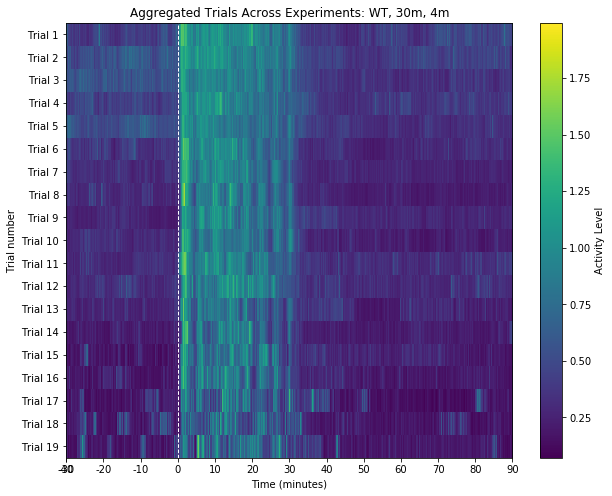

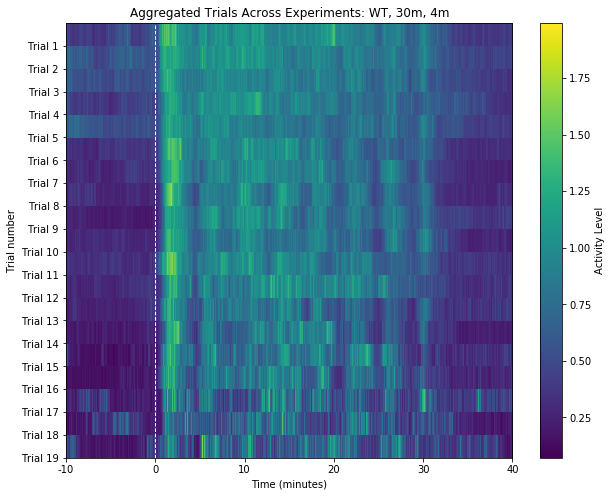

In [2]:
import pickle
%matplotlib inline
from analysis_functions.heatmap_indiv import *

# Load the pickle data
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Define filtering parameters
genotype = 'WT'
duration = '30m'
period_suffix = '4m'
exclude_dates = ['052623WT_30m_4mPeriod',]
#exclude_dates =['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod','051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod']

all_trial_averages, time_axis_minutes = aggregate_heatmap(test_result, genotype, duration, period_suffix, exclude_dates)

# To specify a narrower  time range for the heatmap
x_min = -10
x_max = 40

plot_adjustable_heatmap(all_trial_averages, time_axis_minutes, f"Aggregated Trials Across Experiments: {genotype}, {duration}, {period_suffix}", x_min, x_max)

## Traces of aggregated trials

This plots a sine wave trace of all compiled experiment with the same condition, you can exlude experiments or individual worms

2. **Prepare DataFrame**:
   - A DataFrame (`df`) is created from the filtered data, where each row represents a worm and columns represent different trials. Specific worms can be excluded from the analysis if needed.


3. **Aggregate Data**:
   - We define a function `prepare_aggregated_data_from_df` that aggregates data from the DataFrame:
     - **Extract Time Indices**: Selects time indices based on a range of `tau` values from -10 to 40.
     - **Initialize Aggregated Data**: Initializes an empty list to store aggregated trial data and extracts normalized stimulus data.
     - **Determine Maximum Trials**: Calculates the maximum number of trials by checking for non-NaN values in the trial columns.
     - **Aggregate Data for Each Trial**: Iterates through each experiment and worm, extracts valid data for each trial, and aggregates it.
     - **Return Aggregated Data**: Returns the aggregated data, sliced tau values, adjusted stimulus data, and the number of trials.
     

4. **Plot Aggregated Trials**:
   - The function `plot_aggregated_trials` is used to visualize the aggregated data:
     - For each trial, the mean and confidence intervals are calculated using bootstrapping.
     - The mean trace and confidence intervals are plotted for each trial, along with the stimulus data.


Filtered Experiments:
050923WT_30m_3mPeriod
041823WT_30m_3mPeriod
051624WT_30m_3mPeriod
052024WT_s2_30m_3mPeriod
052024WT_s1_30m_3mPeriod
052424WT_s2_30m_3mPeriod
052824WT_s2_30m_3mPeriod
Experiment to Color Mapping:
050923WT_30m_3mPeriod: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
041823WT_30m_3mPeriod: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)
051624WT_30m_3mPeriod: (1.0, 0.4980392156862745, 0.054901960784313725)
052024WT_s2_30m_3mPeriod: (1.0, 0.7333333333333333, 0.47058823529411764)
052024WT_s1_30m_3mPeriod: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
052424WT_s2_30m_3mPeriod: (0.596078431372549, 0.8745098039215686, 0.5411764705882353)
052824WT_s2_30m_3mPeriod: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)


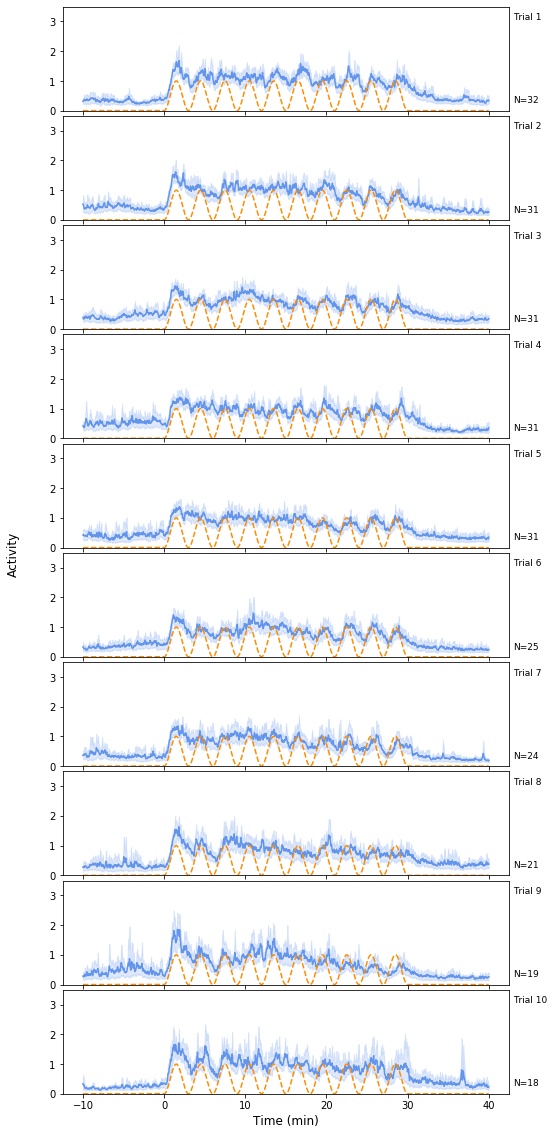

In [3]:
import pickle
from analysis_functions.results_sin_indiv import *
from analysis_functions.PCA_behavior import *

# Load the pickle data

with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Load and filter the data
test_result, filtered_experiments = load_and_filter_data(
    filepath='data/LDS_response_sinFunc_indiv.pickle',
    genotype='WT',
    duration='30m',
    period_suffix='3m',
    exclude_dates = ['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod','051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod',]
    #exclude_dates=['052623WT_30m_4mPeriod',]
)

# Assuming 'tau' is accessible from 'test_result'
tau = test_result['tau']

# Exclude specific worms if necessary
exclude_worms = {
    '051624WT_30m_3mPeriod': [0,1,3],'052824WT_s2_30m_3mPeriod':[0,1],'050923WT_30m_3mPeriod': [3] }

# Prepare the data DataFrame
df = prepare_data_df(test_result, filtered_experiments, trials_range=range(15))

# Exclude specific worms from the DataFrame
df = exclude_worms_from_df(df, exclude_worms)
#df
# Specify the maximum number of trials
max_trials_limit = 10

# Prepare aggregated data from the filtered DataFrame
aggregated_data, sliced_tau, adjusted_stim_data, max_trials = prepare_aggregated_data_from_df(df, tau, test_result, max_trials_limit)

# Plot aggregated trials
plot_aggregated_trials(aggregated_data, sliced_tau, adjusted_stim_data, max_trials)
